In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("STRIKE_REPORTS.csv")

C:\Users\gokul\AppData\Local\Temp\ipykernel_18880\1763893204.py:1: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("STRIKE_REPORTS.csv")


In [3]:
selected_columns=['INCIDENT_MONTH','INCIDENT_YEAR','LATITUDE','LONGITUDE', 
                    'SIZE','NR_INJURIES','NR_FATALITIES']
df=df[selected_columns]

In [4]:
df['NR_INJURIES'].fillna(0,inplace=True)
df['NR_FATALITIES'].fillna(0,inplace=True)

In [5]:
encoder=LabelEncoder()
df['SIZE']=encoder.fit_transform(df['SIZE'])

In [6]:
X=df.drop(['NR_INJURIES'],axis=1)
y=df['NR_INJURIES']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
imputer=SimpleImputer(strategy='mean')
X_train=imputer.fit_transform(X_train)
X_test=imputer.transform(X_test)

In [9]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
y_pred=model.predict(X_test)

In [12]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [13]:
print(f"\nMean Absolute Error (MAE):{mae}")
print(f"Mean Squared Error (MSE):{mse}")
print(f"R-squared (R2):{r2}")


Mean Absolute Error (MAE):0.002690455202007696
Mean Squared Error (MSE):0.0035467604498157865
R-squared (R2):-0.15815317435855403


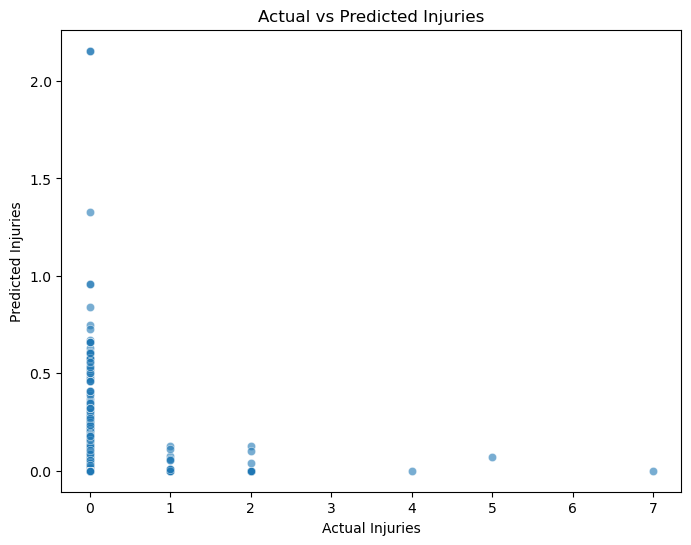

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred,alpha=0.6)
plt.title("Actual vs Predicted Injuries")
plt.xlabel("Actual Injuries")
plt.ylabel("Predicted Injuries")
plt.show()